# Machine Learning 109 fall Hw3

撰寫一個 python 程式做簡單的影像處理：

### 利用 Pandas 的 read_pickle()讀入存放在 HW3.pkl 的圖片

In [10]:
import pandas as pd
pklData = pd.read_pickle('HW3.pkl')
pklData

,Lenna,Misaka,Dog,Hashimoto,AndyLau,Apple
Original,"[[[225, 137, 125], [224, 137, 130], [225, 137,...","[[[90, 184, 237], [90, 184, 237], [90, 184, 23...","[[[132, 132, 78], [132, 132, 78], [131, 131, 7...","[[[243, 244, 249], [228, 229, 234], [230, 231,...","[[[132, 130, 115], [137, 135, 120], [139, 137,...","[[[45, 31, 30], [45, 31, 30], [45, 31, 30], [4..."


### 取出任何一張圖片，並利用 plt.imshow()顯示圖片於螢幕

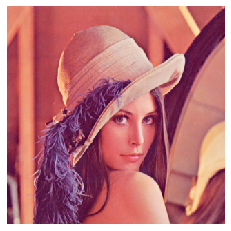

In [26]:
import matplotlib.pyplot as plt # %matplotlib inline
import numpy as np
# from PIL import Image
imgLenna = pklData['Lenna'][0]
# img = img.astype('int32')
plt.axis('off')
plt.imshow( imgLenna )
# img
plt.show()

### 將上述圖片拆解出其 RGB 的成份，並分別顯示在螢幕上。

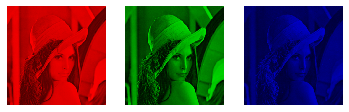

In [28]:
shape = imgLenna.shape
R = np.zeros( ( shape[0], shape[1], shape[2] ), dtype = int )
G = np.zeros( ( shape[0], shape[1], shape[2] ), dtype = int )
B = np.zeros( ( shape[0], shape[1], shape[2] ), dtype = int )

R[:, :, 0] = imgLenna[:, :, 0]
G[:, :, 1] = imgLenna[:, :, 1]
B[:, :, 2] = imgLenna[:, :, 2]
# plt.axis('off')
f, axes = plt.subplots( 1, 3 )
axes[0].imshow( R )
axes[1].imshow( G )
axes[2].imshow( B )
axes[0].axis( 'off' )
axes[1].axis( 'off' )
axes[2].axis( 'off' )
plt.show()

### 將 R、G、B 三張圖片分別做 Convolution

In [87]:
def Convolution( img, kernel ) :
    # return the convolution image result
    imgShape = img.shape
    kerShape = kernel.shape
    # print( imgShape, kerShape )
    width_conv = imgShape[0]-kerShape[0]+1
    length_conv = imgShape[1]-kerShape[1]+1
    img_conv = np.zeros( ( width_conv, length_conv, imgShape[2] ), dtype = int )
    # create the new image after convolution
    for i in range( width_conv ) :
        for j in range( length_conv ) :
            temp = np.zeros( ( imgShape[2] ), dtype = float )
            for ki in range( kerShape[0] ) :
                for kj in range( kerShape[1] ) :
                    temp += img[i+ki][j+kj]*kernel[ki][kj]
            if ( temp[0] < 0 ) :
                temp[0] = 0 ;
            if ( temp[1] < 0 ) :
                temp[1] = 0
            if ( temp[2] < 0 ) :
                temp[2] = 0
            if ( temp[0] > 255 ) :
                temp[0] = 255 ;
            if ( temp[1] > 255 ) :
                temp[1] = 255
            if ( temp[2] > 255 ) :
                temp[2] = 255
            img_conv[i][j] = temp.astype('int')
            # print( type(temp) )
    return img_conv


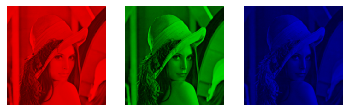

In [88]:
kernel_Blur_3x3 = np.array([[1/9, 1/9, 1/9],
                            [1/9, 1/9, 1/9],
                            [1/9, 1/9, 1/9]])
R_convBlur = Convolution( R, kernel_Blur_3x3 )
G_convBlur = Convolution( G, kernel_Blur_3x3 )
B_convBlur = Convolution( B, kernel_Blur_3x3 )

f, axes = plt.subplots( 1, 3 )
axes[0].imshow( R_convBlur )
axes[1].imshow( G_convBlur )
axes[2].imshow( B_convBlur )
axes[0].axis( 'off' )
axes[1].axis( 'off' )
axes[2].axis( 'off' )
plt.show()

### 將 R、G、B 三張圖合併變回彩色圖片，並顯示於螢幕

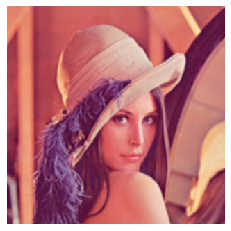

In [89]:
shape_convBlur = R_convBlur.shape
imgBlur_mergeRGB = np.zeros( ( shape_convBlur[0], shape_convBlur[1], shape_convBlur[2] ), dtype = int )
imgBlur_mergeRGB[:, :, 0] = R_convBlur[:, :, 0]
imgBlur_mergeRGB[:, :, 1] = G_convBlur[:, :, 1]
imgBlur_mergeRGB[:, :, 2] = B_convBlur[:, :, 2]
plt.axis('off')
plt.imshow( imgBlur_mergeRGB )
plt.show()

### 改採用底下的kernel做convolution，可以找到水平方向的圖片邉緣

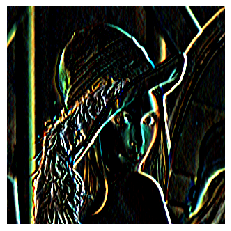

In [90]:
kernel_4x4 = np.array([[1, 1, -1, -1],
                       [1, 1, -1, -1],
                       [1, 1, -1, -1],
                       [1, 1, -1, -1]])
imgEdge = Convolution( imgLenna, kernel_4x4 )
# call my previous Convolution function 
plt.axis('off')
plt.imshow( imgEdge )
plt.show()